In [1]:
import numpy as np
import georinex as gr
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

data_path = Path('./files/')

file_names = [
    'MET300FIN_R_20222572300_01H_30S_MO.crx',
    'MET300FIN_R_20222572300_01H_MN.rnx',
    'METS00FIN_R_20222572300_01H_30S_GO.crx',
    'METS00FIN_R_20222572300_01H_GN.rnx'    
]

# MO = gr.load(data_path / file_names[0])
# MN = gr.load(data_path / file_names[1])
# GO = gr.load(data_path / file_names[2])
# GN = gr.load(data_path / file_names[3])



In [4]:
orbits=gr.load('igr22273.sp3')
print(orbits)
print(orbits.position.shape)
print(orbits.position)

<xarray.Dataset>
Dimensions:   (time: 96, sv: 32, ECEF: 3)
Coordinates:
  * time      (time) datetime64[ns] 2022-09-14 ... 2022-09-14T23:45:00
  * sv        (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'
  * ECEF      (ECEF) <U1 'x' 'y' 'z'
Data variables:
    position  (time, sv, ECEF) float64 -2.245e+04 -1.454e+04 ... 8.088e+03
    clock     (time, sv) float64 284.4 -646.1 -350.5 ... -537.0 -193.4 -233.5
    velocity  (time, sv, ECEF) float64 -2.038e+04 -1.159e+04 ... 0.0 0.0
    dclock    (time, sv) float64 0.0 0.0 0.0 ... 8.179e-85 1.487e+20 7.295e+175
Attributes:
    t0:          2022-09-14 00:00:00
    Nepoch:      96
    coord_sys:   IGb14
    orbit_type:  HLM
    agency:       IGS
(96, 32, 3)
<xarray.DataArray 'position' (time: 96, sv: 32, ECEF: 3)>
array([[[-22450.196094, -14538.617053,   -399.306957],
        [ 18284.586262,  16862.00022 ,   9738.95112 ],
        [-12013.765113, -14930.479017,  18308.843709],
        ...,
        [-16344.449073,   6868.781

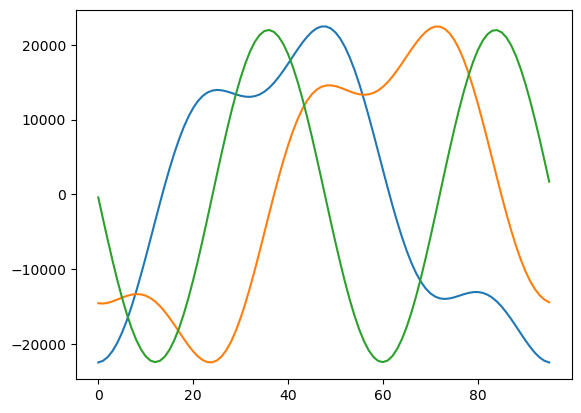

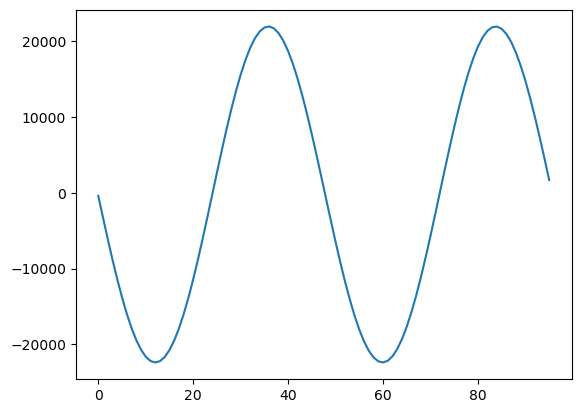

In [11]:
orbits=gr.load('igr22273.sp3')
#print(orbits)
#print(orbits.position.shape)
#print(orbits.position)

xs=np.arange(0,96)
plt.plot(xs,orbits.position[:,0,0],xs,orbits.position[:,0,1],xs,orbits.position[:,0,2])
#plt.plot(orbits.position[:,0,0])
plt.show()
plt.plot(xs,orbits.position[:,0,2])
plt.show()
#print(orbits.position[:,0,1])
#plt.plot(orbits.position[:,0,1])
#plt.show()
#print(orbits.position[:,0,2])
#plt.plot(orbits.position[:,0,2])
#plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (96,)

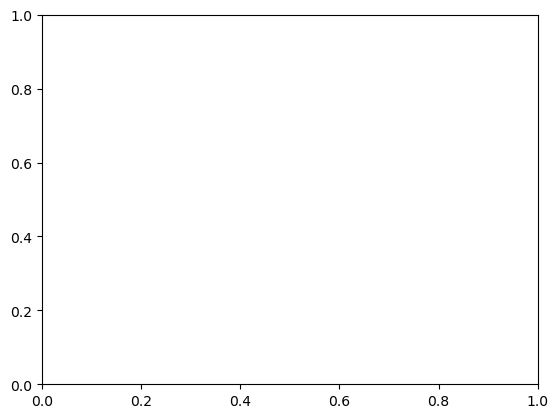

In [6]:
xs = np.arange(orbits.time.shape[0])
X, Y, Z = orbits.position[:,1,0], orbits.position[:,1,1], orbits.position[:,1,2]

plt.plot(xs, X)
plt.show()

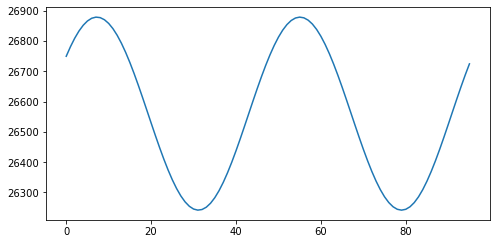

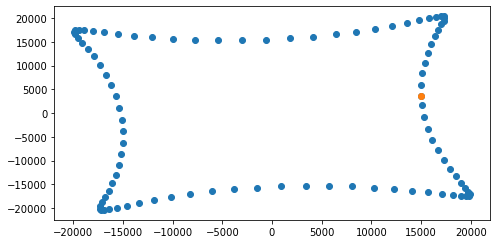

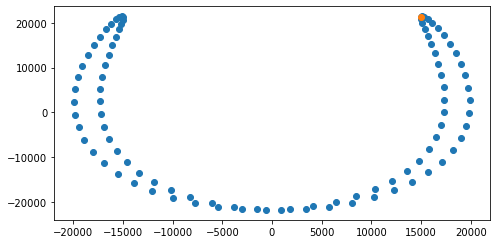

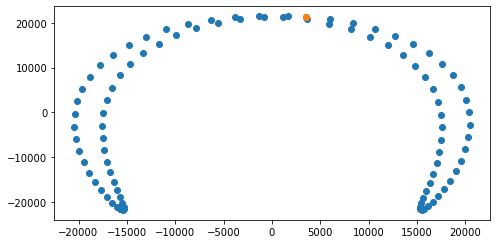

In [8]:
plt.plot(np.sqrt(orbits.position[:,0,0]**2+orbits.position[:,0,1]**2+orbits.position[:,0,2]**2))
plt.show()
x1=orbits.position[:,24,0]
y1=orbits.position[:,24,1]
z1=orbits.position[:,24,2]

#print(np.min(x1),np.max(x1),np.min(y1),np.max(y1),np.min(z1),np.max(z1))

plt.scatter(x1,y1)
plt.scatter(x1[0],y1[0])
plt.show()
plt.scatter(x1,z1)
plt.scatter(x1[0],z1[0])
plt.show()
plt.scatter(y1,z1)
plt.scatter(y1[0],z1[0])
plt.show()

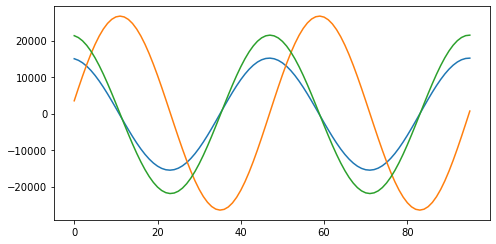

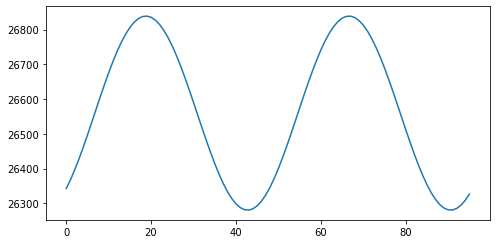

In [9]:
x2=0*x1
y2=0*y1
z2=1*z1
angle=0*z1

for j in range(96):
    angle[j]=j*2*np.pi/96
    x2[j]=np.cos(angle[j])*x1[j]-np.sin(angle[j])*y1[j]
    y2[j]=np.cos(angle[j])*y1[j]+np.sin(angle[j])*x1[j]
    

coef=np.mean(abs(x2))    
#x2=x2/coef
#y2=y2/coef
#z2=z2/coef

plt.plot(xs,x2,xs,y2,xs,z2)
plt.show()

plt.plot(np.sqrt(x2**2+y2**2+z2**2))
plt.show()

In [10]:
np.sin(.5*np.pi)

1.0

C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_23952\2933925551.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


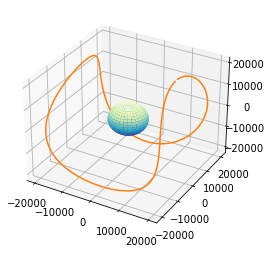

C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_23952\2933925551.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(30, 20)


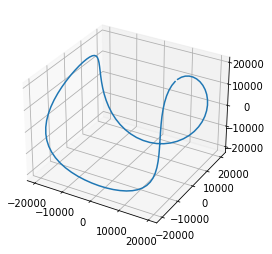

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = 6378* (np.cos(u) * np.sin(v))
y = 6378* (np.sin(u) * np.sin(v))
z = 6378* (np.cos(v))
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
ax = fig.gca(projection='3d')
plt.plot(x1, y1, z1)
plt.show()

print(z.shape)




fig = plt.figure()
ax = fig.gca(projection='3d')
plt.plot(x1, y1, z1)

plt.show() 

C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_17400\1546777491.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


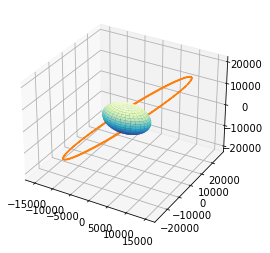

C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_17400\1546777491.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(30, 20)


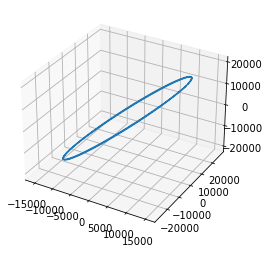

In [36]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = 6378* (np.cos(u) * np.sin(v))
y = 6378* (np.sin(u) * np.sin(v))
z = 6378* (np.cos(v))
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
ax = fig.gca(projection='3d')
plt.plot(x2, y2, z2)
plt.show()

print(z.shape)




fig = plt.figure()
ax = fig.gca(projection='3d')
plt.plot(x2, y2, z2)

plt.show() 

In [42]:
print(0.001*np.sqrt(2892584.725**2+1311715.261**2+5512639.399**2))

6362.1408708587005


In [13]:
timeoffset=[-0.000192589641, -0.000203333007, -0.000214078251, -0.000224819826, -0.000235553878, -0.000246287587, -0.000257020863, -0.00026775461, -0.000278493378, -0.000289236027, -0.000299982535, -0.000310732304, -0.000321481201, -0.00033223212, -0.000342988045, -0.000353749425, -0.000364508212, -0.000375269077, -0.000386030907, -0.000396795598, -0.000407555903, -0.000418311976, -0.000429069254, -0.000439829929, -0.000450587694, -0.000461341359, -0.000472088888, -0.000482837245, -0.000493580512, 0.000495678388, 0.000484941785, 0.000474209513, 0.00046347932, 0.00045275031, 0.000442020723, 0.000431289608, 0.00042055391, 0.000409822208, 0.000399088765, 0.000388356561, 0.000377621795, 0.000366885625, 0.000356152907, 0.000345417852, 0.000334679432, 0.000323935733, 0.000313196135, 0.00030245525, 0.000291718349, 0.000280980471, 0.000270242603, 0.000259499067, 0.000248748498, 0.000237997786, 0.000227243615, 0.000216485304, 0.000205725009, 0.000194964702, 0.000184202461, 0.000173443586, 0.000162686617, 0.000151929046, 0.000141170303, 0.000130411797, 0.000119658569, 0.000108902124, 9.8144867e-05, 8.7390126e-05, 7.6637163e-05, 6.5888839e-05, 5.5141435e-05, 4.4392443e-05, 3.3642381e-05, 2.2892547e-05, 1.2142207e-05, 1.39441e-06, -9.351962e-06, -2.0097688e-05, -3.0842441e-05, -4.1585996e-05, -5.2328623e-05, -6.3072005e-05, -7.3815995e-05, -8.4559866e-05, -9.5307791e-05, -0.000106061154, -0.000116815936, -0.000127575589, -0.000138333565, -0.000149091219, -0.000159847005, -0.000170597857, -0.000181350115, -0.000192101925, -0.000202852602, -0.000213596757, -0.000224337267, -0.000235072406, -0.000245812123, -0.000256548804, -0.000267280039, -0.000278008964, -0.000288737279, -0.000299463635, -0.000310182069, -0.000320904779, -0.000331632949, -0.000342361964, -0.000353089815, -0.000363820852, -0.000374558457, -0.00038529334, -0.000396032845, -0.000406767919, -0.000417502885, -0.000428240153, -0.000438977605, -0.000449720973, -0.00046046339, -0.000471202515]
np.nanmean(MO.L2C)
x=MO.L2C
x=MO.C1C
print(x.shape)

(120, 64)


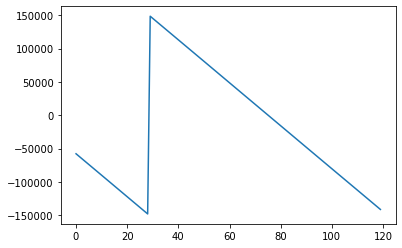

In [4]:
time_offset_range=299792458*np.asarray(timeoffset)
plt.plot(time_offset_range)
plt.show()

In [33]:
x=MO.C1C
ranges1=np.asarray(x.data)
x2=np.nanmean(ranges1,0)
index1=(x2>0)
print(index1)
print(x2)
print(x2.shape)
print(x2[34:64])

x=MO.C5I
ranges5=np.asarray(x.data)
x2=np.nanmean(ranges5,0)
index1=(x2>0)
print(index1)
print(x2)
print(x2.shape)
print(x2[34:64])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[              nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan       

C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_19472\2600940038.py:3: RuntimeWarning: Mean of empty slice
  x2=np.nanmean(ranges1,0)
C:\Users\SvanteHenriksson\AppData\Local\Temp\ipykernel_19472\2600940038.py:12: RuntimeWarning: Mean of empty slice
  x2=np.nanmean(ranges5,0)


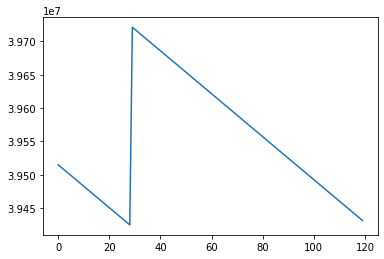

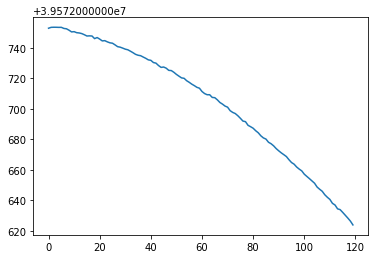

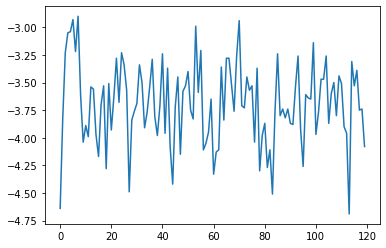

In [6]:
plt.plot(ranges1[:,63])
plt.show()
plt.plot(ranges1[:,63]-time_offset_range)
plt.show()
plt.plot(ranges1[:,63]-ranges5[:,63])
plt.show()

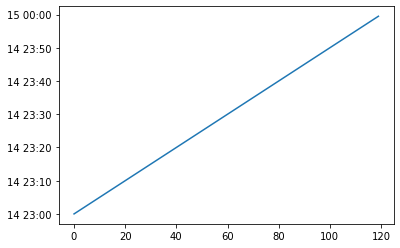

In [7]:
plt.plot((MO.time).data)
plt.show()

In [8]:
timeoffset=[-0.000192589641, -0.000203333007, -0.000214078251, -0.000224819826, -0.000235553878, -0.000246287587, -0.000257020863, -0.00026775461, -0.000278493378, -0.000289236027, -0.000299982535, -0.000310732304, -0.000321481201, -0.00033223212, -0.000342988045, -0.000353749425, -0.000364508212, -0.000375269077, -0.000386030907, -0.000396795598, -0.000407555903, -0.000418311976, -0.000429069254, -0.000439829929, -0.000450587694, -0.000461341359, -0.000472088888, -0.000482837245, -0.000493580512, 0.000495678388, 0.000484941785, 0.000474209513, 0.00046347932, 0.00045275031, 0.000442020723, 0.000431289608, 0.00042055391, 0.000409822208, 0.000399088765, 0.000388356561, 0.000377621795, 0.000366885625, 0.000356152907, 0.000345417852, 0.000334679432, 0.000323935733, 0.000313196135, 0.00030245525, 0.000291718349, 0.000280980471, 0.000270242603, 0.000259499067, 0.000248748498, 0.000237997786, 0.000227243615, 0.000216485304, 0.000205725009, 0.000194964702, 0.000184202461, 0.000173443586, 0.000162686617, 0.000151929046, 0.000141170303, 0.000130411797, 0.000119658569, 0.000108902124, 9.8144867e-05, 8.7390126e-05, 7.6637163e-05, 6.5888839e-05, 5.5141435e-05, 4.4392443e-05, 3.3642381e-05, 2.2892547e-05, 1.2142207e-05, 1.39441e-06, -9.351962e-06, -2.0097688e-05, -3.0842441e-05, -4.1585996e-05, -5.2328623e-05, -6.3072005e-05, -7.3815995e-05, -8.4559866e-05, -9.5307791e-05, -0.000106061154, -0.000116815936, -0.000127575589, -0.000138333565, -0.000149091219, -0.000159847005, -0.000170597857, -0.000181350115, -0.000192101925, -0.000202852602, -0.000213596757, -0.000224337267, -0.000235072406, -0.000245812123, -0.000256548804, -0.000267280039, -0.000278008964, -0.000288737279, -0.000299463635, -0.000310182069, -0.000320904779, -0.000331632949, -0.000342361964, -0.000353089815, -0.000363820852, -0.000374558457, -0.00038529334, -0.000396032845, -0.000406767919, -0.000417502885, -0.000428240153, -0.000438977605, -0.000449720973, -0.00046046339, -0.000471202515]

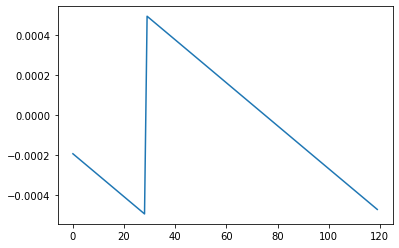

120


In [9]:
plt.plot(timeoffset)
plt.show()
print(len(timeoffset))

In [10]:
print(max(timeoffset))
print(min(timeoffset))

0.000495678388
-0.000493580512


In [29]:
print(ranges1.shape)
print(ranges1[:,52])
print(ranges1[:,63])
print(ranges1[:,35])

(120, 64)
[19211368.667 19203441.51  19195627.624 19187928.306 19180345.997
 19172877.588 19165524.611 19158285.934 19151160.895 19144149.535
 19137253.013 19130471.957 19123806.066 19117256.737 19110822.438
 19104503.098 19098301.864 19092217.441 19086249.448 19080398.99
 19074667.24  19069054.747 19063560.4   19058183.685 19052926.473
 19047789.994 19042773.933 19037876.958 19033100.368 19328237.244
 19323703.003 19319289.866 19314996.736 19310825.229 19306773.576
 19302842.676 19299030.674 19295340.76  19291772.342 19288324.333
 19284997.704 19281792.359 19278708.984 19275747.29  19272906.798
 19270186.263 19267588.588 19265113.376 19262761.627 19260532.223
 19258425.102 19256439.127 19254574.145 19252830.959 19251210.494
 19249711.862 19248335.673 19247082.01  19245952.075 19244945.551
 19244062.929 19243303.801 19242668.268 19242155.746 19241768.234
 19241503.733 19241362.276 19241345.868 19241452.891 19241684.922
 19242041.117 19242520.581 19243123.704 19243850.05  19244700.834
 